<a href="https://colab.research.google.com/github/AgengAbi/Machine_Learning_2024/blob/main/ML_Regresi_Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum
Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

#### Instruksi Umum:
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.



## Tugas 1: Multiple Linear Regression



1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

### Catatan Tambahan

1. Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
2. Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
3. Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# import dataset
data = pd.read_csv('insurance.csv')
data.head()
# data.info()
# data.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Variabel bebas dan variabel target** <br>
Dari Data tersebut dapat kita simpulkan bahwa: <br>
Variabel bebas: <br>
1. age
2. sex
3. bmi
4. children
5. smoker
6. region

Variabel target:
1. charges

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

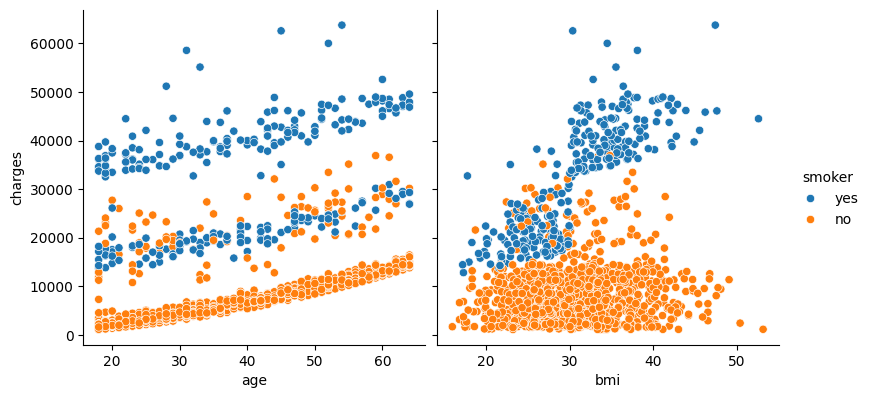

In [ ]:
sns.pairplot(data, x_vars=['age', 'bmi'], y_vars='charges', height=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

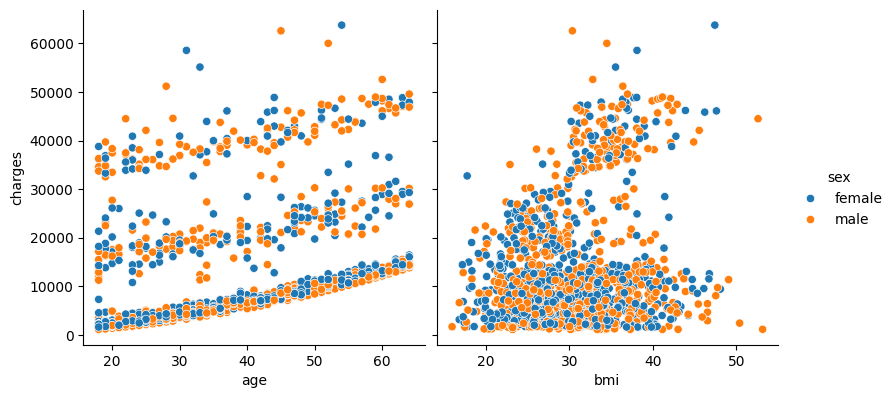

In [ ]:
sns.pairplot(data, x_vars=['age', 'bmi'], y_vars='charges', height=4, aspect=1, kind='scatter', hue='sex')
plt.show()

Bisa dilihat dari 2 scatter plot di atas, persebaran data untuk `smoker` lebih tersegmentasi dimana perokok mendapatkan charges lebih tinggi dari pada yang tidak, sedangkan `sex` persebarannya tidak tersegmentasi.

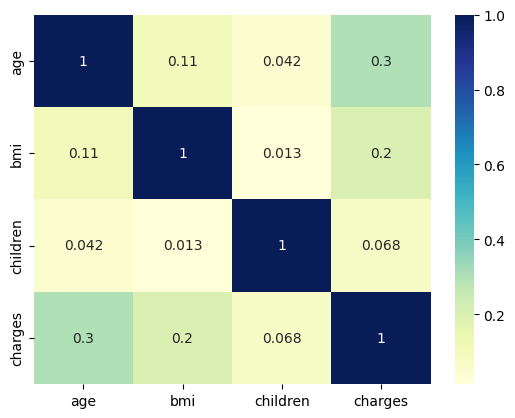

In [ ]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

Dari hasil heatmap dapat disimpulkan bahwa yang memiliki hubungan yang cukup tinggi terhadap `charges` adalah `age` dan `bmi`. Maka dari itu, variabel bebas yang akan digunakan adalah `age`, `bmi` dan juga `smoker` dimana pada scatterplot sebelumnya tergambar segmentasi yang baik yang bisa digunakan sebagai variabel. <br><br>

Namun karena data pada variabel smoker bukanlah data numerik maka diperlukan konversi data non-numerik menjadi numerik dengan menggunakan metode encoding.

In [ ]:
le = LabelEncoder()

data['smoker'] = le.fit_transform(data['smoker'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### 2. Membagi dataset menjadi data latih (train) dan data uji (test)

In [ ]:
x = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 3. Lakukan feature scaling jika diperlukan.

In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 4. Membuat model multiple linear refression menggunakan Scikit-Learn

In [ ]:
model = LinearRegression()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
model.fit(x_train, y_train)

print(f"Koefesien: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Koefesien: [3649.22243928 1971.94254098 9568.27908831]
Intercept: 13346.089736364485


In [ ]:
y_pred = model.predict(x_test)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR-squared (R2): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")


R-squared (R2): 0.78
MAE (Mean Absolute Error): 4260.56
MSE (Mean Squared Error): 34512843.88
